<a href="https://colab.research.google.com/github/Masterak25/ML_AK/blob/main/deloitte_presents_machine_learning_challenge_predict_loan_defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

# IMPORTING TRAIN DATASET for building model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv',engine='python', error_bad_lines=False) 
df.head()

In [ ]:
df.shape

#AUTOVIZ -AUTO VISUALIZATION 

In [ ]:
#!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()

Shape of your Data Set loaded: (67463, 35)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    35 Predictors classified...
        5 variables removed since they were ID or low-information variables
9 numeric variables in data exceeds limit, taking top 30 variables
Number of All Scatter Plots = 45


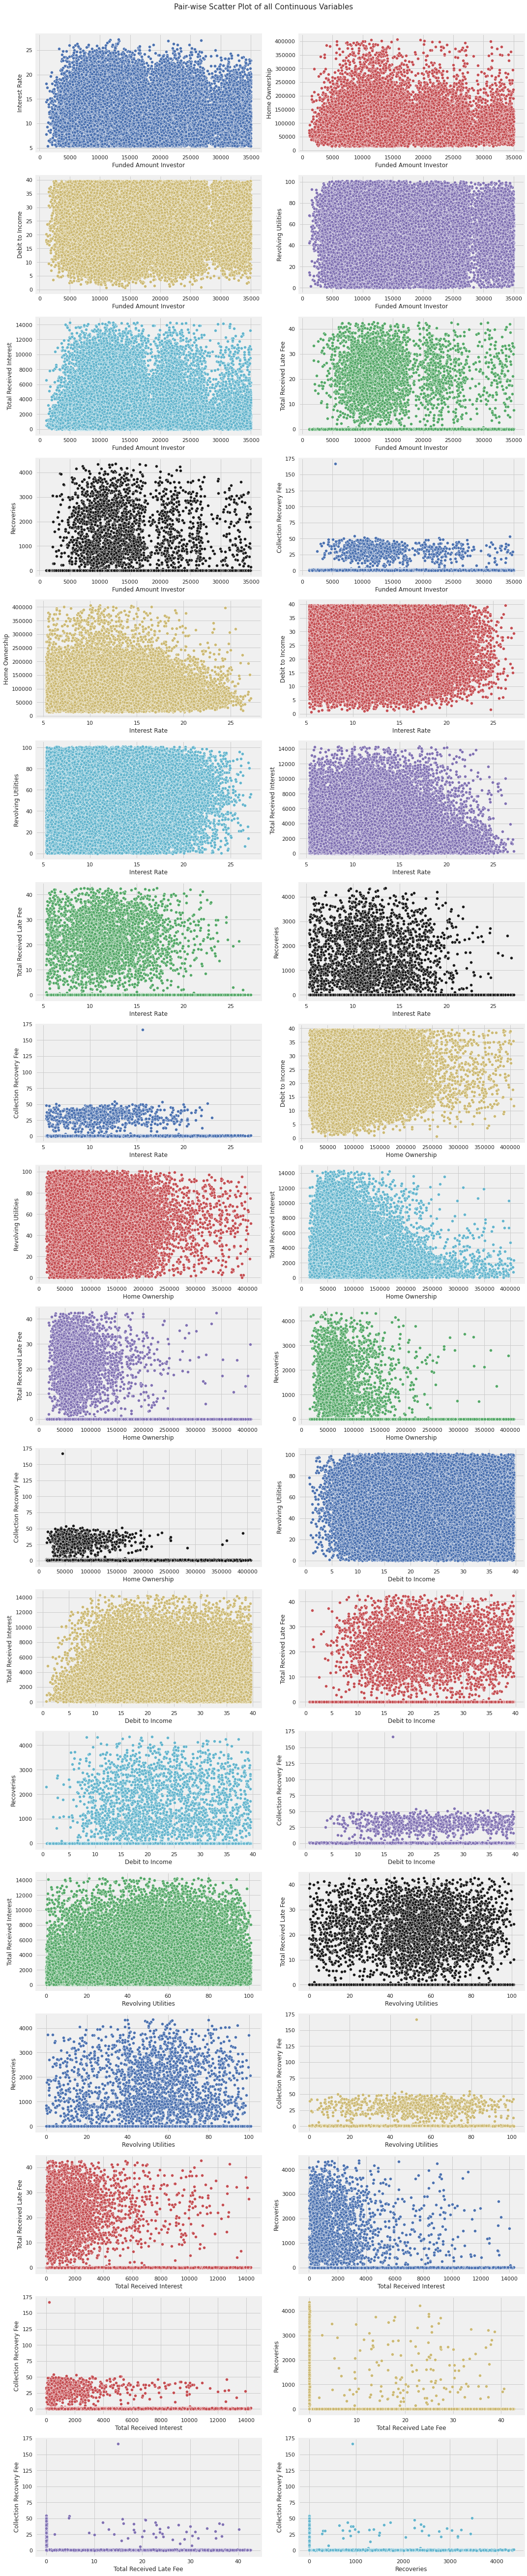

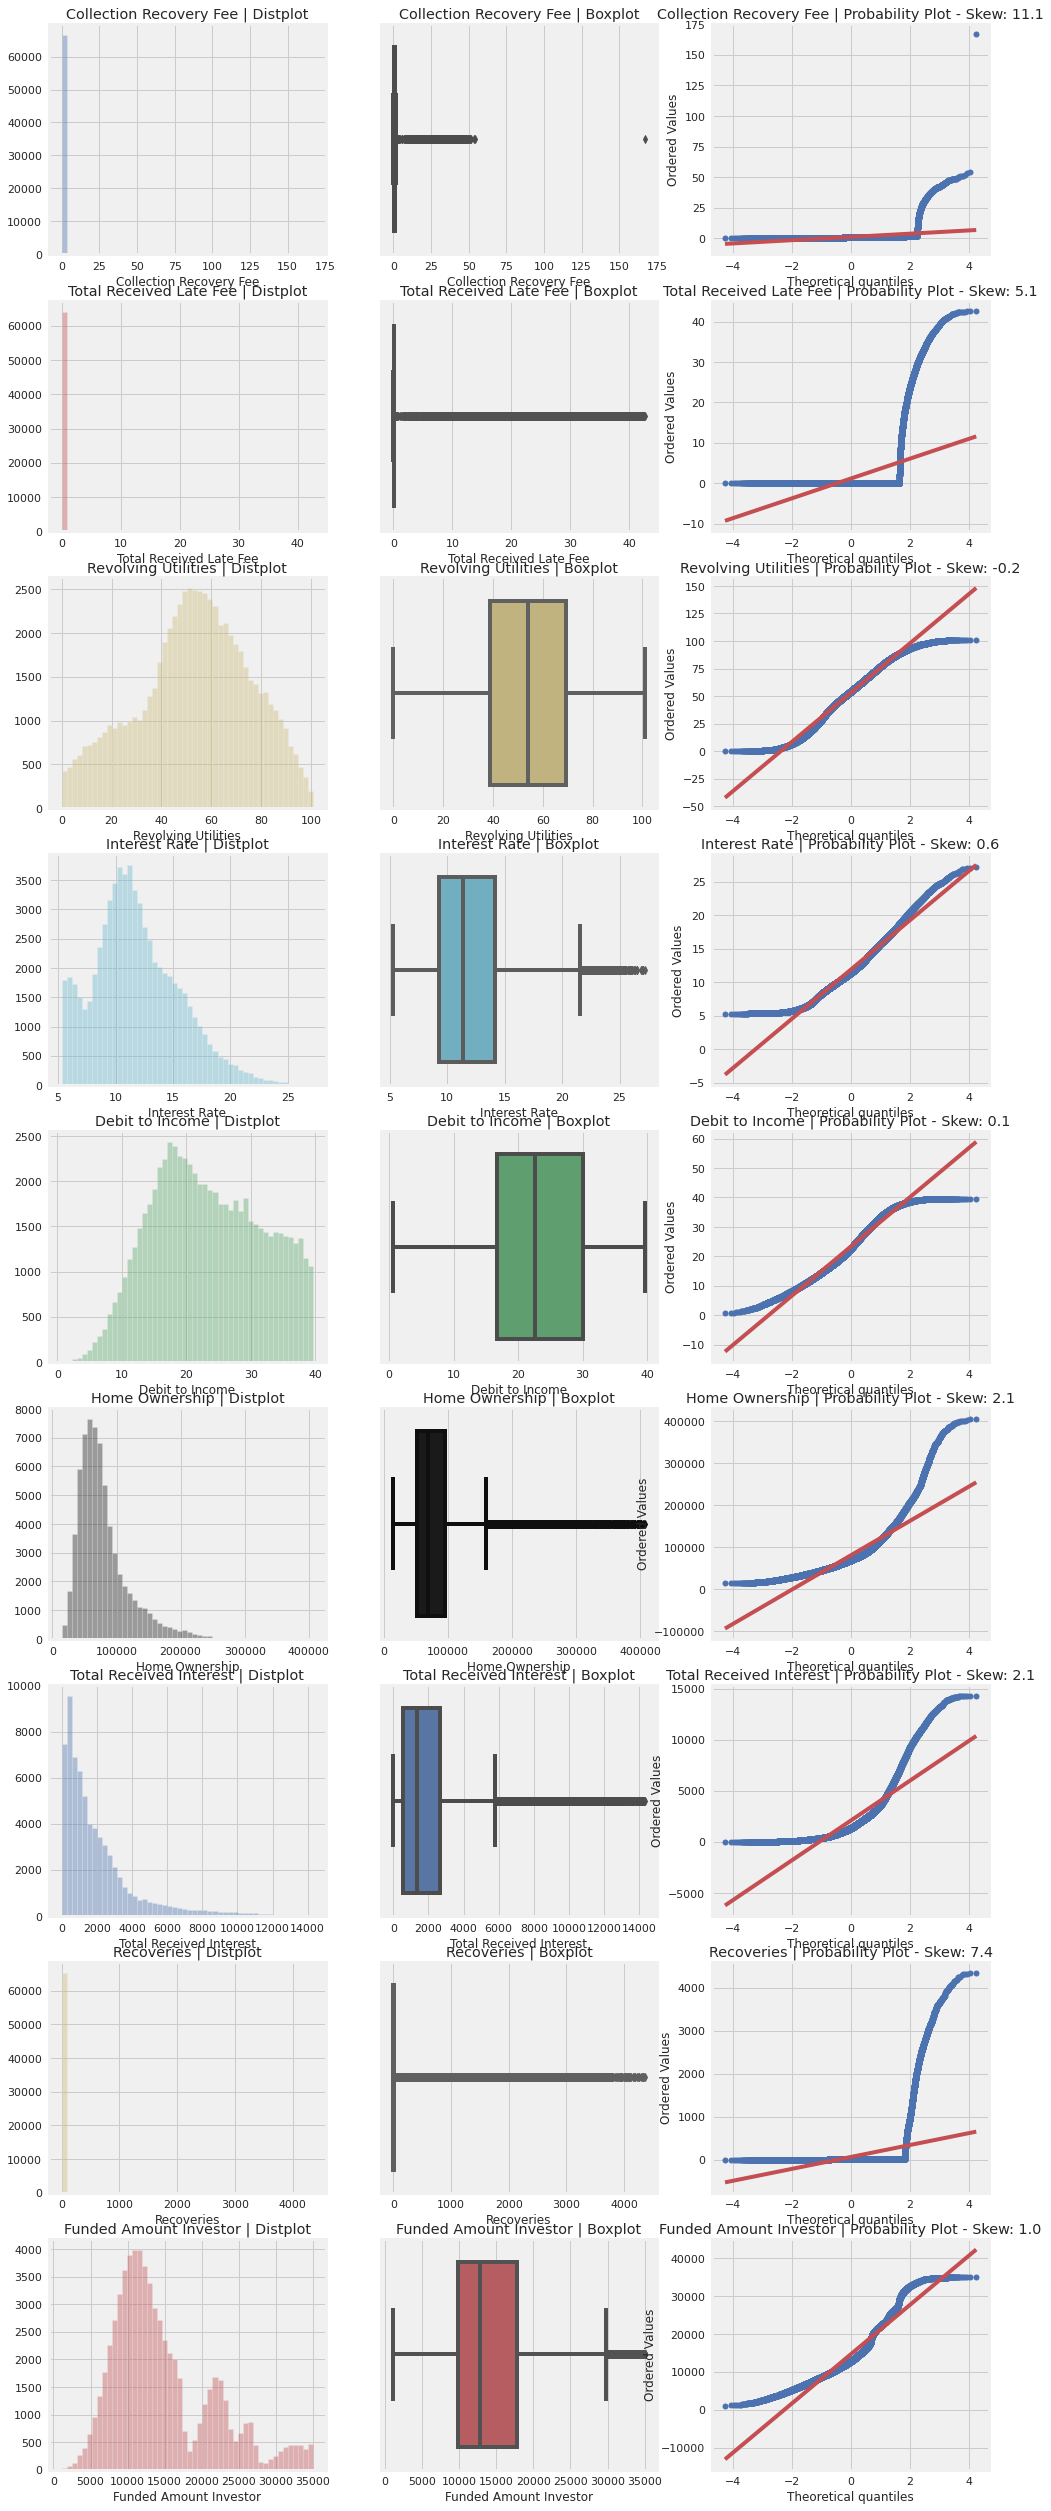

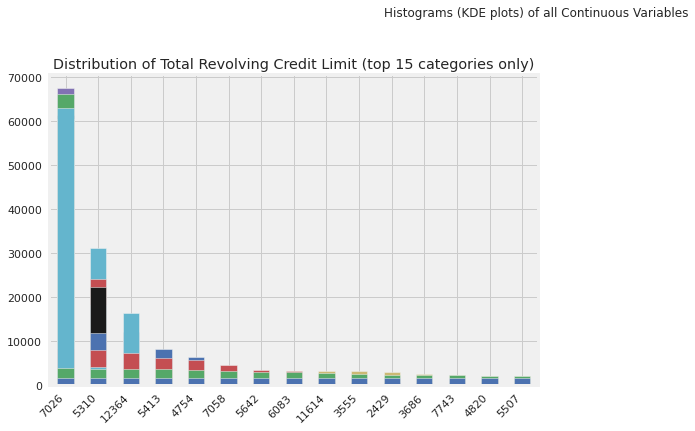

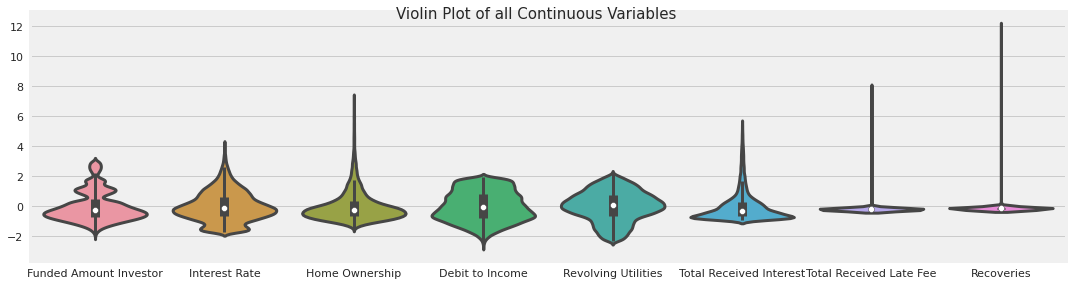

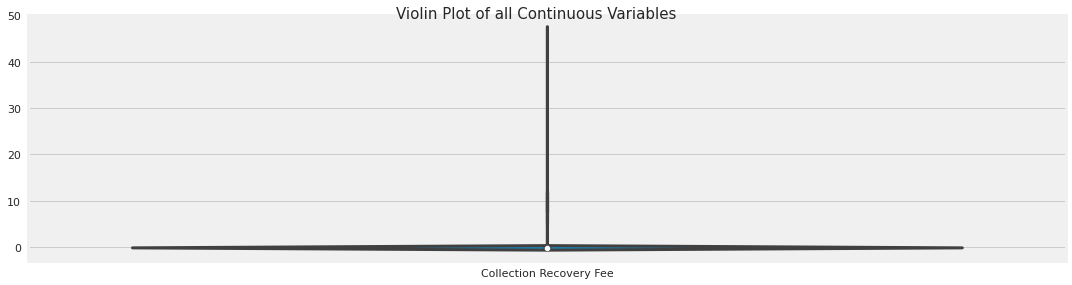

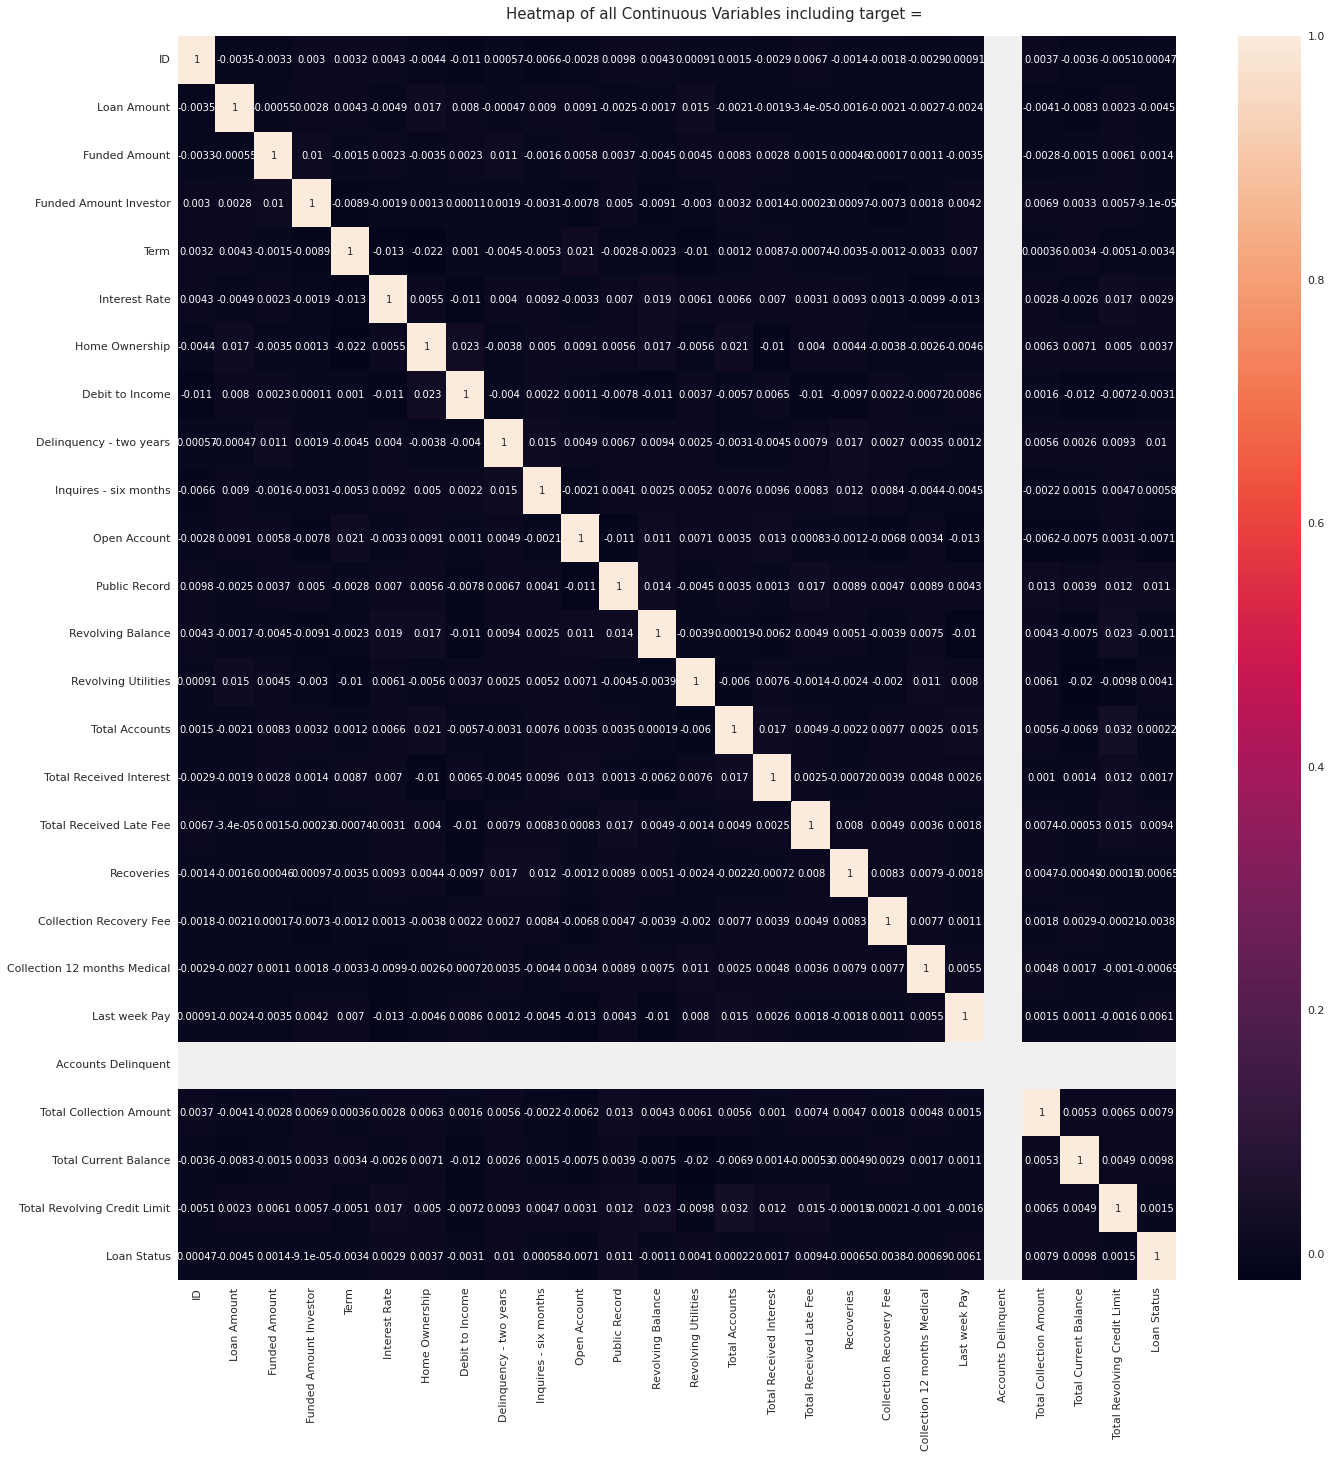

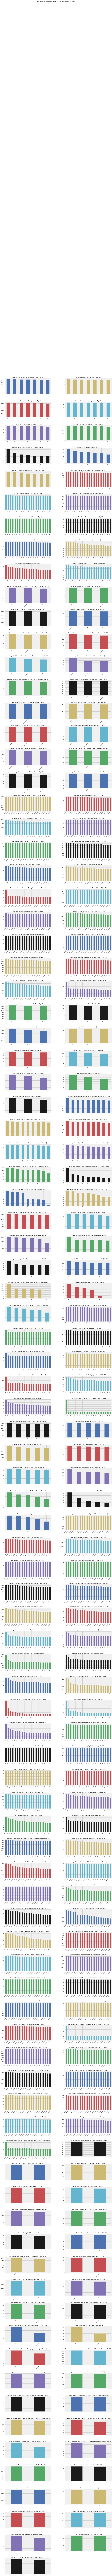

Time to run AutoViz (in seconds) = 78

 ###################### VISUALIZATION Completed ########################


In [ ]:
filename = "train.csv"
sep = ","
dft = AV.AutoViz(
filename,
sep=",",
depVar="",
dfte=None,
header=0,
verbose=0,
lowess=False,
chart_format="svg",
max_rows_analyzed=150000,
max_cols_analyzed=30,
)

# Feature Engineering

In [ ]:
df=df.drop(['ID','Accounts Delinquent','Payment Plan'],axis=1)
df.head()

In [ ]:
df.info()

In [ ]:
df.isnull().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collection Amount         0
Total Current 

In [ ]:
df.shape

(67463, 32)

# Normality check using skewness

In [ ]:
df.skew(axis = 0, skipna = True)

Loan Amount                      0.288083
Funded Amount                    0.672633
Funded Amount Investor           0.990139
Term                            -6.381623
Interest Rate                    0.563383
Home Ownership                   2.130488
Debit to Income                  0.080967
Delinquency - two years          4.635021
Inquires - six months            3.711972
Open Account                     1.465107
Public Record                    6.236185
Revolving Balance                2.951135
Revolving Utilities             -0.237245
Total Accounts                   0.734122
Total Received Interest          2.135243
Total Received Late Fee          5.084511
Recoveries                       7.371787
Collection Recovery Fee         11.102131
Collection 12 months Medical     6.631051
Last week Pay                    0.261989
Total Collection Amount         12.910972
Total Current Balance            1.511578
Total Revolving Credit Limit     1.977150
Loan Status                      2

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical,

If the skewness is between -1 and — 0.5 or between 0.5 and 1, the data are moderately skewed,

If the skewness is less than -1 or greater than 1, the data are highly skewed

Here some of the target variables are highly skewed,so it is better to normalize our response varibles

# Using Label Encoder to convert the object type variables into numerical type

In [ ]:
col_name_objects = df.select_dtypes(include=['object']).columns.values
col_name_objects

array(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Loan Title', 'Initial List Status',
       'Application Type'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in col_name_objects:
  df[col] = LE.fit_transform(df[col])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Batch Enrolled                67463 non-null  int64  
 5   Interest Rate                 67463 non-null  float64
 6   Grade                         67463 non-null  int64  
 7   Sub Grade                     67463 non-null  int64  
 8   Employment Duration           67463 non-null  int64  
 9   Home Ownership                67463 non-null  float64
 10  Verification Status           67463 non-null  int64  
 11  Loan Title                    67463 non-null  int64  
 12  Debit to Income               67463 non-null  float64
 13  D

# Exploratory Data Analysis

In [ ]:
x_corr = df.corr() 
x_corr

Loan Amount  ...  Loan Status
Loan Amount                      1.000000  ...    -0.004473
Funded Amount                   -0.000551  ...     0.001364
Funded Amount Investor           0.002831  ...    -0.000091
Term                             0.004277  ...    -0.003410
Batch Enrolled                   0.002124  ...    -0.007817
Interest Rate                   -0.004888  ...     0.002900
Grade                           -0.015667  ...     0.011657
Sub Grade                       -0.002793  ...     0.003675
Employment Duration             -0.017834  ...     0.011927
Home Ownership                   0.016691  ...     0.003716
Verification Status              0.006533  ...    -0.001143
Loan Title                      -0.002672  ...    -0.000416
Debit to Income                  0.007959  ...    -0.003057
Delinquency - two years         -0.000469  ...     0.009990
Inquires - six months            0.008962  ...     0.000578
Open Account                     0.009088  ...    -0.007073
Public Record                   -0.002542  ...     0.010590
Revolving Balance               -0.001738  ...    -0.001073
Revolving Utilities              0.014828  ...     0.004120
Total Accounts                  -0.002071  ...     0.000222
Initial List Status              0.002199  ...    -0.013445
Total Received Interest         -0.001887  ...     0.001680
Total Received Late Fee         -0.000034  ...     0.009365
Recoveries                      -0.001606  ...    -0.000652
Collection Recovery Fee         -0.002142  ...    -0.003828
Collection 12 months Medical    -0.002726  ...    -0.000686
Application Type                 0.003750  ...    -0.000454
Last week Pay                   -0.002362  ...     0.006117
Total Collection Amount         -0.004135  ...     0.007892
Total Current Balance           -0.008285  ...     0.009828
Total Revolving Credit Limit     0.002289  ...     0.001454
Loan Status                     -0.004473  ...     1.000000

[32 rows x 32 columns]

# correlograms

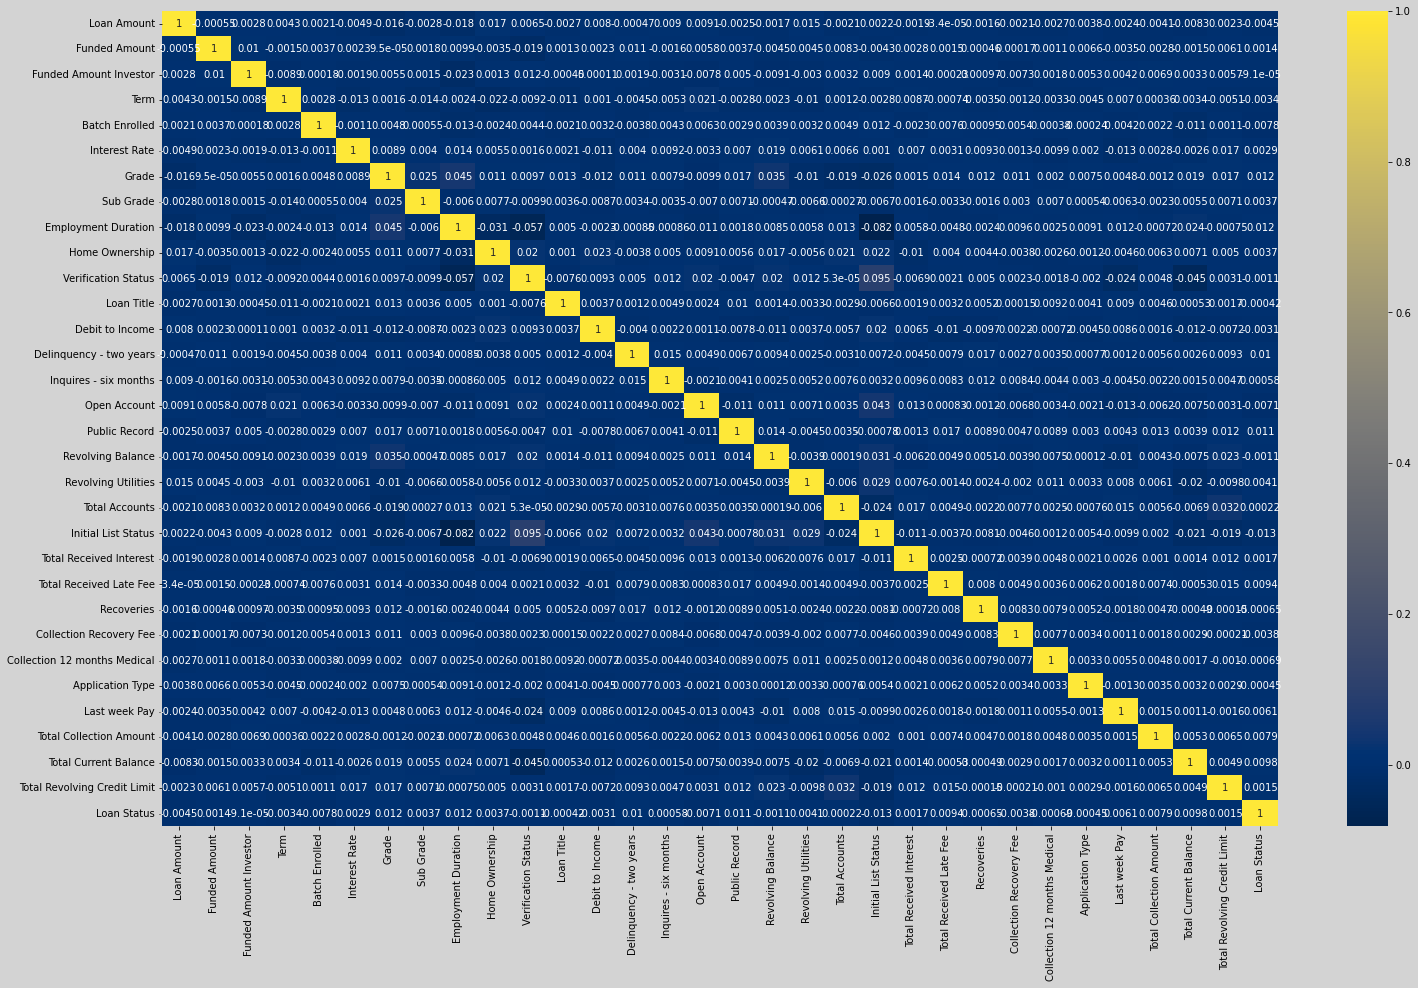

In [ ]:
plt.figure(figsize=(25, 15),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(x_corr, annot=True, cmap='cividis');
plt.show()

# creating target and response variable for model building

In [ ]:
x_ind=df.drop('Loan Status',axis=1)
y_dep=df["Loan Status"]

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
RUS = RandomUnderSampler(random_state=2)
x_resampled, y_resampled = RUS.fit_resample(x_ind, y_dep)


In [ ]:
df1=x_resampled
df1["Loan Status"]=y_resampled
df1.head()

Loan Amount  Funded Amount  ...  Total Revolving Credit Limit  Loan Status
0        31127          10963  ...                         24414            0
1         3163          12028  ...                         56354            0
2         4824           5466  ...                          2883            0
3         5825          16612  ...                         16619            0
4        28832          27102  ...                         79118            0

[5 rows x 32 columns]

# PCA

In [ ]:
#scaling the dataset by using Standard Scaler
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X_norm = norm.fit_transform(x_resampled)

In [ ]:
from sklearn.decomposition import PCA
pca_reduce = PCA()
X_norm_pca = pca_reduce.fit_transform(X_norm)
X_norm_pca

array([[ 2.1171834 , -0.5867417 ,  0.40002038, ...,  0.32678374,
        -0.94431783, -0.39136383],
       [-1.52358739,  0.02500798,  0.68392887, ..., -1.32088451,
        -0.11478986, -0.66865595],
       [-0.56242785, -1.09820181, -1.31343278, ...,  1.41989624,
        -1.2062487 ,  1.76933662],
       ...,
       [-0.23426869, -2.13826984,  0.10231068, ..., -1.26142772,
        -0.71530186,  0.02432322],
       [ 0.96946893,  0.68505399,  1.20060536, ..., -1.56468969,
        -2.04727499, -0.63738329],
       [ 1.6120077 ,  0.17874084,  0.65246462, ..., -1.02739729,
         0.1841851 , -0.23039942]])

In [ ]:
cov_mat = np.cov(X_norm.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

In [ ]:
explained_variance = pca_reduce.explained_variance_ratio_
explained_variance

array([0.03837443, 0.03575795, 0.03402987, 0.03401725, 0.03370257,
       0.03331875, 0.03299486, 0.03285311, 0.03257553, 0.03244443,
       0.03229657, 0.03201434, 0.03196879, 0.03160719, 0.0314    ,
       0.03102769, 0.03095916, 0.0306667 , 0.03045152, 0.03018763,
       0.0300267 , 0.02996875, 0.02981925, 0.02960141, 0.02951987,
       0.02934089, 0.02907027, 0.02891934, 0.02856896, 0.0283127 ,
       0.02737286, 0.02683066])

In [ ]:
sum(explained_variance[0:31]) #n_components = 31

0.9731693393215747

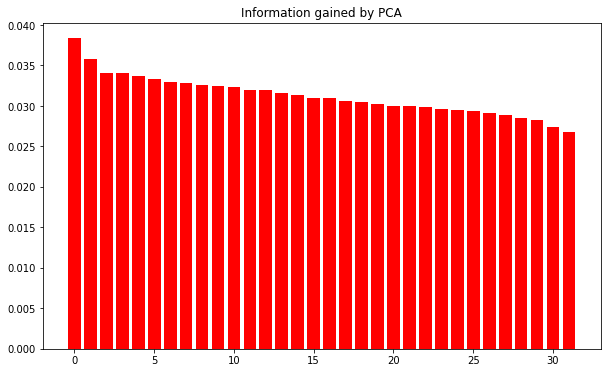

In [ ]:
plt.figure(figsize=(10,6))
plt.bar(range(32),explained_variance, color='red')
plt.title('Information gained by PCA')
plt.show()

In [ ]:
pca = PCA(n_components=31)
X_ind_pca = pca.fit_transform(X_norm)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_ind_pca, y_resampled,train_size=0.8, random_state=2)

# RANDOM_FOREST_CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(random_state=2)

In [ ]:
model_rf=model_rf.fit(x_train,y_train)

In [ ]:
y_pred_RF=model_rf.predict(x_test)

In [ ]:
y_pred_RF1 = model_rf.predict(x_train)

 **CONFUSION MATRIX AND ACCURACY OF RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cnf=confusion_matrix(y_test,y_pred_RF)

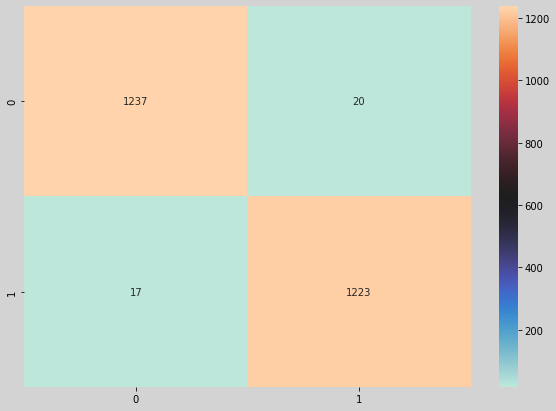

In [ ]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='icefire',fmt='.4g');
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

**TRAIN ACCURACY**

In [ ]:
rf_tt=accuracy_score(y_train,y_pred_RF1) * 100
rf_tt

100.0

**TEST ACCURACY**

In [ ]:
rf_t=accuracy_score(y_test,y_pred_RF) * 100
rf_t

98.51822186623949

## NAIVE-BAYES CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_NB=GaussianNB()

In [ ]:
model_NB.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_NB = model_NB.predict(x_test)

In [ ]:
y_pred_NB1 = model_NB.predict(x_train)

**CONFUSION MATRIX AND ACCURACY OF NAIVE BAYES MODEL**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cnf=confusion_matrix(y_test,y_pred_NB)


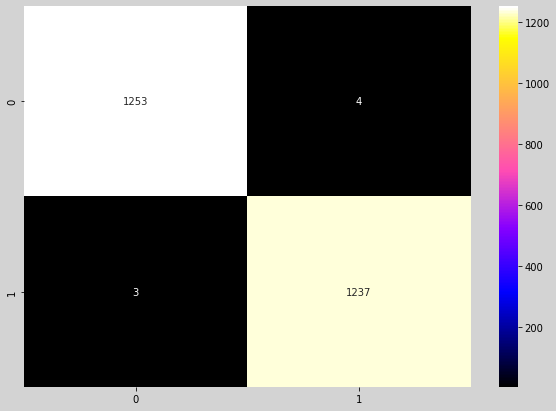

In [ ]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='gnuplot2',fmt='.4g');
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

**TRAIN ACCURACY**

In [ ]:
nb_tt1=accuracy_score(y_train,y_pred_NB1) * 100
nb_tt1

99.66950425638458

**TEST ACCURACY**

In [ ]:
nb_t1=accuracy_score(y_test,y_pred_NB) * 100
nb_t1

99.71966359631558

 Classification Report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
Rep=classification_report(y_test,y_pred_NB)
print(Rep)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1257
           1       1.00      1.00      1.00      1240

    accuracy                           1.00      2497
   macro avg       1.00      1.00      1.00      2497
weighted avg       1.00      1.00      1.00      2497



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_log=LogisticRegression()

In [ ]:
model_log.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_log=model_log.predict(x_test)

In [ ]:
y_pred_log1=model_log.predict(x_train)

**CONFUSION MATRIX AND ACCURACY OF NAIVE BAYES MODEL**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [ ]:
cnf=confusion_matrix(y_test,y_pred_log)


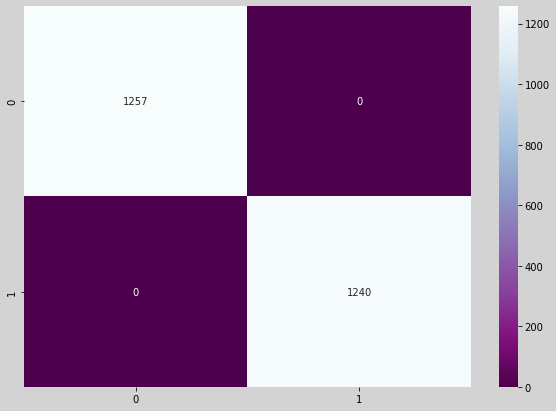

In [ ]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='BuPu_r',fmt='.4g');
plt.show()

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

**TRAIN ACCURACY**

In [ ]:
log_tt1=accuracy_score(y_train,y_pred_log1) * 100
log_tt1

100.0

**TEST ACCURACY**

In [ ]:
log_t1=accuracy_score(y_test,y_pred_log) * 100
log_t1

100.0

#AutoSKlearnClassifier

In [ ]:
#!pip install auto-sklearn

In [ ]:
import autosklearn
import sklearn
import time
from autosklearn.classification import AutoSklearnClassifier as ASC

In [ ]:
classifier = ASC()
classifier.time_left_for_this_task = 300

In [ ]:
t0 = time.time()
classifier.fit(x_train, y_train)
t1 = time.time()

In [ ]:
autosk_predict = classifier.predict(x_test)
train_autosk_predict = classifier.predict(x_train)

In [ ]:
autosk_accuracy = sklearn.metrics.accuracy_score( \
           y_test, autosk_predict \
           )*100
train_autosk_accuracy = sklearn.metrics.accuracy_score( \
           y_train,train_autosk_predict \
           )*100

In [ ]:
print(f"test accuracy {autosk_accuracy:.4f}")
print(f"train accuracy {train_autosk_accuracy:.4f}")
print(f"time to fit: {t1-t0}")

test accuracy 100.0000
train accuracy 100.0000
time to fit: 295.58465576171875


#ANN

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [ ]:
model=Sequential()

In [ ]:
#first hidden layer
model.add(Dense(units=100,kernel_initializer='he_uniform',activation='relu',input_dim=31))
#second hidden layer
model.add(Dense(units=50,kernel_initializer='he_uniform',activation='relu'))
# last layer or output layer
model.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model1 = model.fit(x_train,y_train,batch_size=100,epochs=100)

Epoch 1/100
100/100 [==============================] - 1s 2ms/step - loss: 0.2006 - accuracy: 0.9440
Epoch 2/100
100/100 [==============================] - 0s 1ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 3/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 4/100
100/100 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 5/100
100/100 [==============================] - 0s 2ms/step - loss: 5.9969e-04 - accuracy: 1.0000
Epoch 6/100
100/100 [==============================] - 0s 2ms/step - loss: 3.9499e-04 - accuracy: 1.0000
Epoch 7/100
100/100 [==============================] - 0s 1ms/step - loss: 2.7891e-04 - accuracy: 1.0000
Epoch 8/100
100/100 [==============================] - 0s 2ms/step - loss: 2.0652e-04 - accuracy: 1.0000
Epoch 9/100
100/100 [==============================] - 0s 2ms/step - loss: 1.5935e-04 - accuracy: 1.0000
Epoch 10/100
100/100 [==============================] - 0s 2ms/step - l

In [ ]:
y_pred_ann1=model.predict(x_train)
y_pred_ann1=(y_pred_ann1>0.5)

In [ ]:
y_pred=model.predict(x_test)

In [136]:
y_pred=(y_pred>0.5)

In [ ]:
cnf=confusion_matrix(y_test,y_pred)

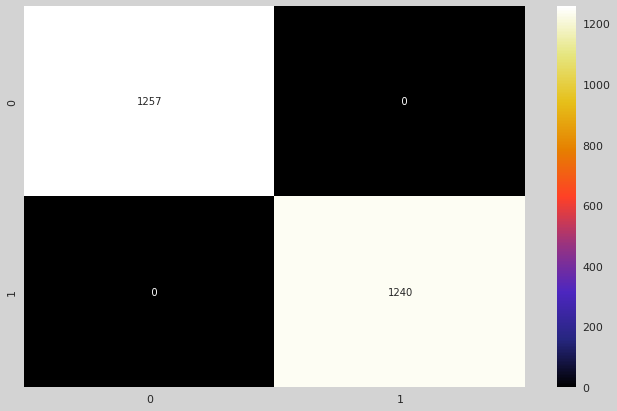

In [137]:
plt.figure(figsize=(10, 7),facecolor="lightgrey",frameon=True,edgecolor='blue') 
sns.heatmap(cnf, annot=True, cmap='CMRmap',fmt='4g');
plt.show()

In [ ]:
print(model1.history.keys())

dict_keys(['loss', 'accuracy'])


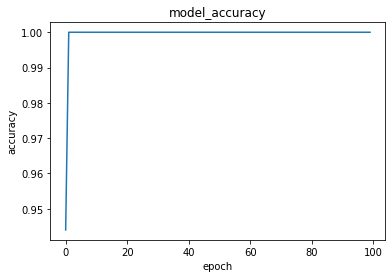

In [ ]:
plt.plot(model1.history['accuracy'])
plt.title("model_accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

**TRAIN ACCURACY**

In [ ]:
ann_tt1=accuracy_score(y_train,y_pred_ann1) * 100
ann_tt1

100.0

**TEST ACCURACY**

In [ ]:
ann_t1=accuracy_score(y_test,y_pred_ann) * 100
ann_t1

100.0

In [ ]:
###

# IMPORTING TEST DATASET Evaluting model

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv


In [ ]:
dft = pd.read_csv('test.csv',engine='python', error_bad_lines=False) 
dft.head()

ID  Loan Amount  ...  Total Revolving Credit Limit  Loan Status
0  56492997        17120  ...                          4364          NaN
1  22540813         7133  ...                          2573          NaN
2   9862181        25291  ...                         19676          NaN
3  10097822        30781  ...                          7226          NaN
4  47771809         8878  ...                         26145          NaN

[5 rows x 35 columns]

In [ ]:
dft.shape

(28913, 35)

In [ ]:
dft=dft.drop(['ID','Accounts Delinquent','Payment Plan','Loan Status'],axis=1)
dft.head()

Loan Amount  ...  Total Revolving Credit Limit
0        17120  ...                          4364
1         7133  ...                          2573
2        25291  ...                         19676
3        30781  ...                          7226
4         8878  ...                         26145

[5 rows x 31 columns]

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   28913 non-null  int64  
 1   Funded Amount                 28913 non-null  int64  
 2   Funded Amount Investor        28913 non-null  float64
 3   Term                          28913 non-null  int64  
 4   Batch Enrolled                28913 non-null  object 
 5   Interest Rate                 28913 non-null  float64
 6   Grade                         28913 non-null  object 
 7   Sub Grade                     28913 non-null  object 
 8   Employment Duration           28913 non-null  object 
 9   Home Ownership                28913 non-null  float64
 10  Verification Status           28913 non-null  object 
 11  Loan Title                    28913 non-null  object 
 12  Debit to Income               28913 non-null  float64
 13  D

In [ ]:
dft.isnull().sum()

Loan Amount                     0
Funded Amount                   0
Funded Amount Investor          0
Term                            0
Batch Enrolled                  0
Interest Rate                   0
Grade                           0
Sub Grade                       0
Employment Duration             0
Home Ownership                  0
Verification Status             0
Loan Title                      0
Debit to Income                 0
Delinquency - two years         0
Inquires - six months           0
Open Account                    0
Public Record                   0
Revolving Balance               0
Revolving Utilities             0
Total Accounts                  0
Initial List Status             0
Total Received Interest         0
Total Received Late Fee         0
Recoveries                      0
Collection Recovery Fee         0
Collection 12 months Medical    0
Application Type                0
Last week Pay                   0
Total Collection Amount         0
Total Current 

In [ ]:
dft.shape

(28913, 31)

# Using Label Encoder to convert the object type variables into numerical type

In [ ]:
col_name_objects = dft.select_dtypes(include=['object']).columns.values
col_name_objects

array(['Batch Enrolled', 'Grade', 'Sub Grade', 'Employment Duration',
       'Verification Status', 'Loan Title', 'Initial List Status',
       'Application Type'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
for col in col_name_objects:
  dft[col] = LE.fit_transform(dft[col])
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28913 entries, 0 to 28912
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   28913 non-null  int64  
 1   Funded Amount                 28913 non-null  int64  
 2   Funded Amount Investor        28913 non-null  float64
 3   Term                          28913 non-null  int64  
 4   Batch Enrolled                28913 non-null  int64  
 5   Interest Rate                 28913 non-null  float64
 6   Grade                         28913 non-null  int64  
 7   Sub Grade                     28913 non-null  int64  
 8   Employment Duration           28913 non-null  int64  
 9   Home Ownership                28913 non-null  float64
 10  Verification Status           28913 non-null  int64  
 11  Loan Title                    28913 non-null  int64  
 12  Debit to Income               28913 non-null  float64
 13  D

In [ ]:
test_data1=dft
y_pred_final =model_log.predict(test_data1)


In [ ]:
dft["Loan Status"]=pd.DataFrame(y_pred_final)
dft.head()

Loan Amount  Funded Amount  ...  Total Revolving Credit Limit  Loan Status
0        17120          10365  ...                          4364            0
1         7133          11650  ...                          2573            0
2        25291          25825  ...                         19676            0
3        30781           9664  ...                          7226            0
4         8878           9419  ...                         26145            1

[5 rows x 32 columns]

# to make sample

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving submission.csv to submission.csv


In [ ]:
dfs=pd.read_csv('submission.csv',index_col=None)
dfs.head()

Loan Status
0            0
1            0
2            0
3            0
4            0

In [ ]:
dfs['Loan Status']=dft['Loan Status']
dfs.head()

Loan Status
0            0
1            0
2            0
3            0
4            1

In [ ]:
dfs

Loan Status
0                0
1                0
2                0
3                0
4                1
...            ...
28908            0
28909            0
28910            0
28911            0
28912            0

[28913 rows x 1 columns]

In [ ]:
dfs.to_csv('KARTHIKEYAN_submission.csv', index=False)

#comparative studies of the above ML models

In [135]:
data = {'train accuracy':[nb_tt1,rf_tt,log_tt1,train_autosk_accuracy,ann_tt1],'test accuracy':[nb_t1,rf_t,log_t1,autosk_accuracy,ann_t1]}
df2 = pd.DataFrame(data)
df2 = pd.DataFrame(data, index=['naive-bayes','random forest','Logistics Regression','AutoSKlearn Classifier','Artificial Neural Network'])
df2.index.rename('ML models', inplace=True)
df2

train accuracy  test accuracy
ML models                                               
naive-bayes                     99.669504      99.719664
random forest                  100.000000      98.518222
Logistics Regression           100.000000     100.000000
AutoSKlearn Classifier         100.000000     100.000000
Artificial Neural Network      100.000000     100.000000

FROM THE TABLE ABOVE WE CAN CLEARLY SEE THAT LOGISTIC REGRESSION OUTPERFORMS OTHER ML CLASSIFIER AFTER FEATURE EXTRACTION USING PCA AND IMBALANCE SAMPLING TECHNIQUES AND LESS PRONE TO OVERFITTING.BOTH AUTO-ML AND DEEP LEARNING ALGORITHMS GIVES PROMISING RESULTS AND THE RESULT TABULATED.